  ID_Cliente  Genero  Uso_Datos  Satisfaccion  Llamadas_Servicio_Cliente  \
0         C1       0   7.496403      4.517181                          2   
1         C2       0   3.568515      1.326606                          5   
2         C3       0  13.272370      3.941994                          2   
3         C4       1  14.408288      4.729633                          3   
4         C5       1  17.700906      1.880152                          0   

   Evasion  Duracion_Contrato  Historial_Pagos  
0        0                  6                2  
1        0                 14                2  
2        1                 12                0  
3        0                 23                1  
4        1                 20                2  


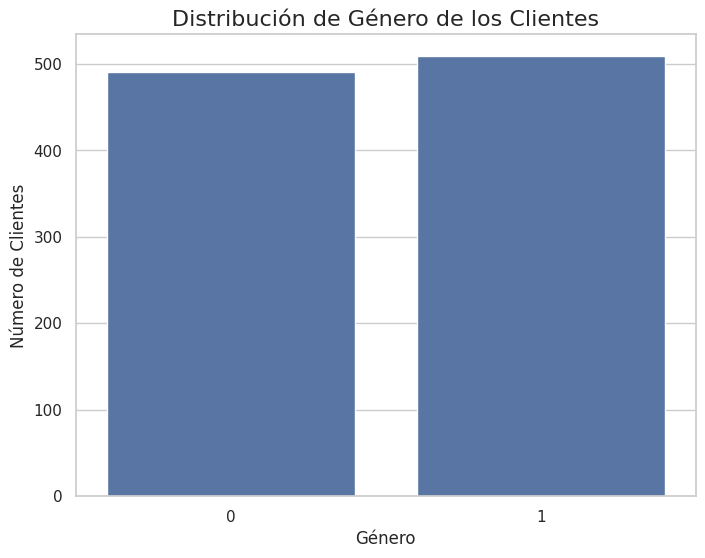

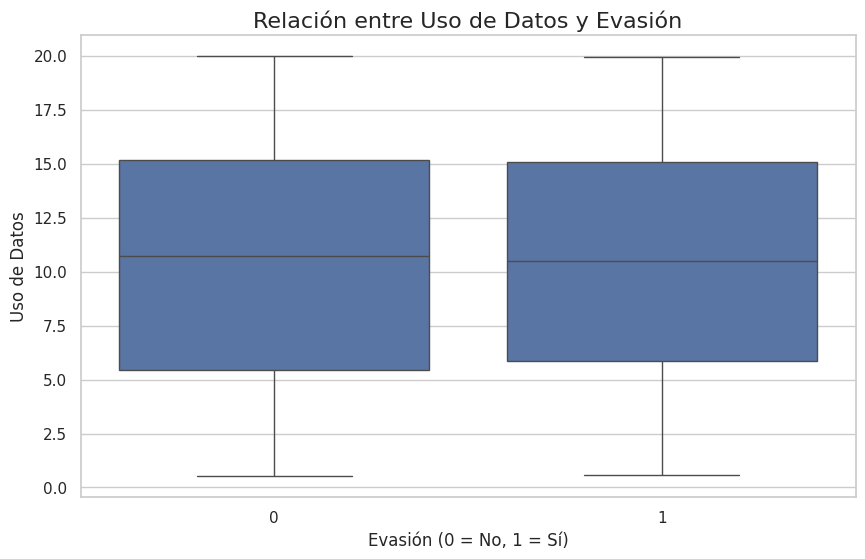

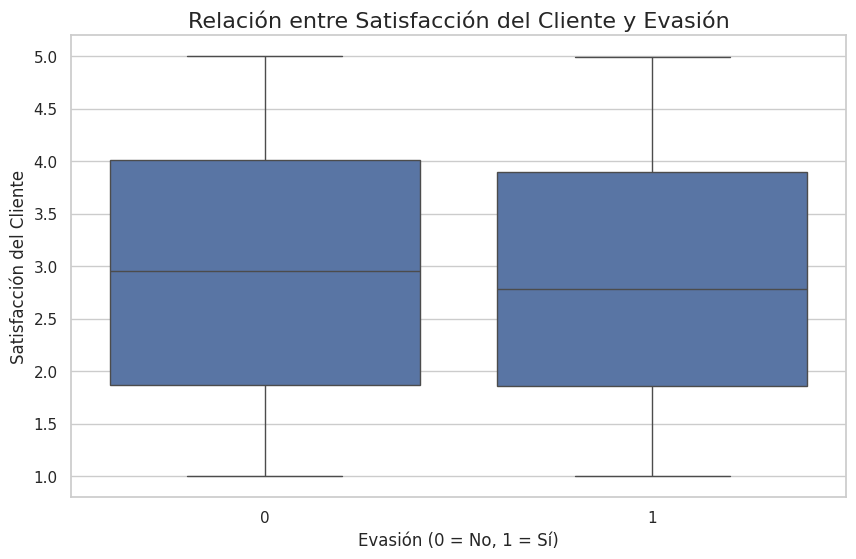

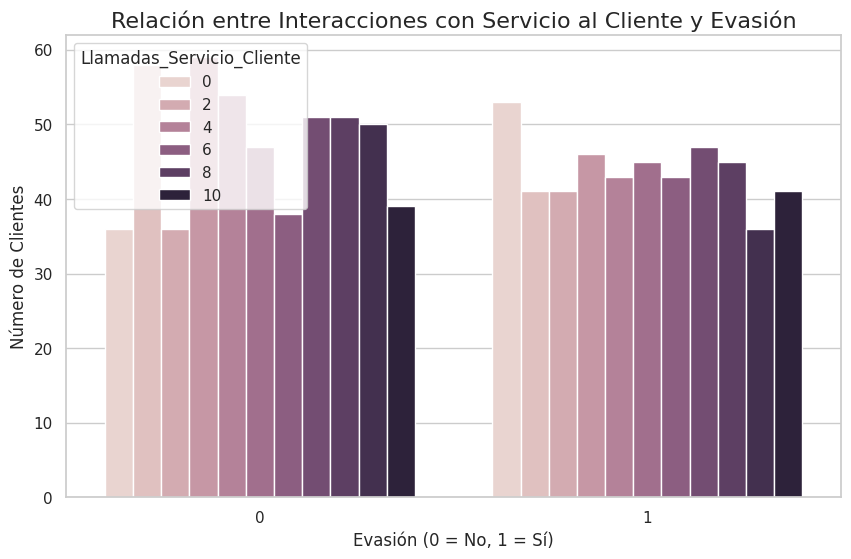

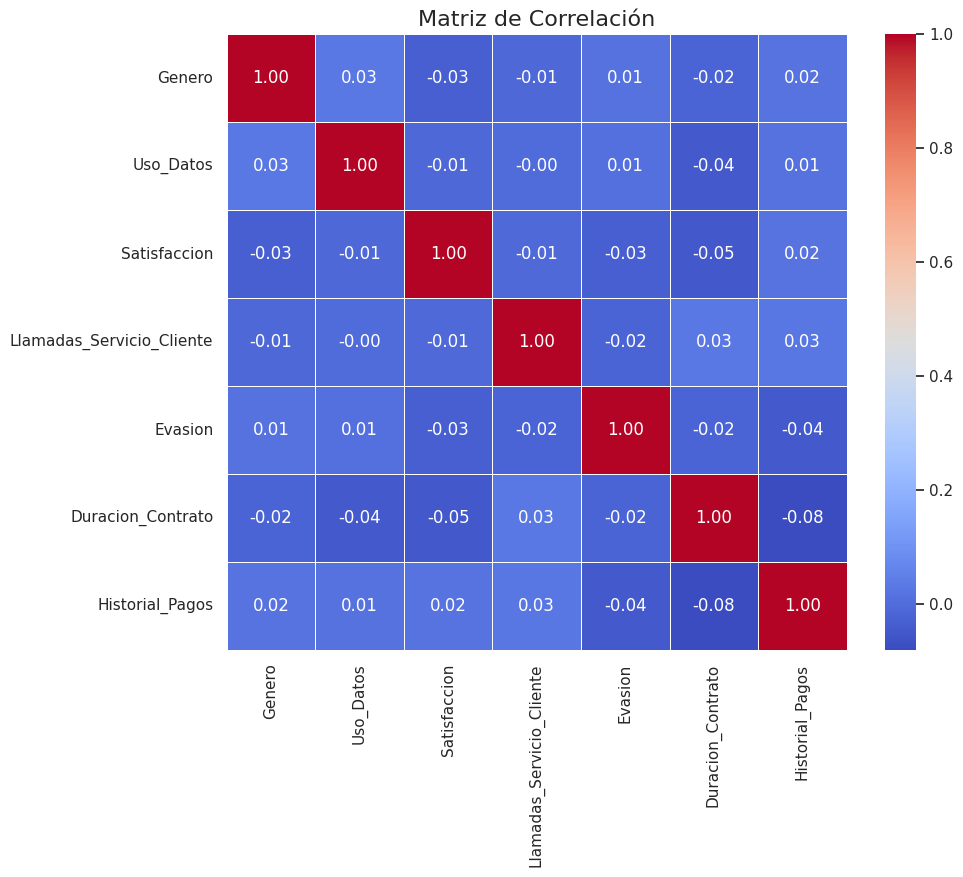


Conteo de Evasión (Abandono de Clientes):
Evasion
0    519
1    481
Name: count, dtype: int64

Tasa de Evasión (Tasa de Abandono): 48.10%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Configuración de estilo de las visualizaciones
sns.set(style="whitegrid")

# Generación de Datos Ficticios para el análisis
n = 1000  # Número de clientes

# Simulamos los datos en español
datos = {
    'ID_Cliente': [f'C{i+1}' for i in range(n)],
    'Genero': [random.choice(['Masculino', 'Femenino']) for _ in range(n)],
    'Uso_Datos': [random.uniform(0.5, 20.0) for _ in range(n)],  # Uso de datos entre 0.5 y 20 GB
    'Satisfaccion': [random.uniform(1, 5) for _ in range(n)],  # Escala de satisfacción de 1 a 5
    'Llamadas_Servicio_Cliente': [random.randint(0, 10) for _ in range(n)],  # Número de interacciones con servicio al cliente
    'Evasion': [random.choice([0, 1]) for _ in range(n)],  # 0 = No, 1 = Sí (evasión de clientes)
    'Duracion_Contrato': [random.randint(1, 24) for _ in range(n)],  # Duración del contrato en meses (1 a 24 meses)
    'Historial_Pagos': [random.choice(['Pagado', 'Atrasado', 'Pendiente']) for _ in range(n)]  # Historial de pagos
}

# Crear un DataFrame con los datos simulados
df = pd.DataFrame(datos)

# Convertir las variables categóricas a numéricas para poder analizarlas
df['Genero'] = df['Genero'].map({'Masculino': 0, 'Femenino': 1})
df['Historial_Pagos'] = df['Historial_Pagos'].map({'Pagado': 0, 'Atrasado': 1, 'Pendiente': 2})

# Ver las primeras filas del DataFrame
print(df.head())

# 📊 Realizar el análisis de los datos

# Gráfico de la distribución del género de los clientes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Genero')
plt.title('Distribución de Género de los Clientes', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

# Gráfico de la relación entre uso de datos y evasión
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Evasion', y='Uso_Datos')
plt.title('Relación entre Uso de Datos y Evasión', fontsize=16)
plt.xlabel('Evasión (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Uso de Datos', fontsize=12)
plt.show()

# Gráfico de la relación entre satisfacción y evasión
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Evasion', y='Satisfaccion')
plt.title('Relación entre Satisfacción del Cliente y Evasión', fontsize=16)
plt.xlabel('Evasión (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Satisfacción del Cliente', fontsize=12)
plt.show()

# Gráfico de la relación entre interacciones con servicio al cliente y evasión
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Evasion', hue='Llamadas_Servicio_Cliente')
plt.title('Relación entre Interacciones con Servicio al Cliente y Evasión', fontsize=16)
plt.xlabel('Evasión (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

# Análisis de la correlación entre variables numéricas
# Filtramos solo las columnas numéricas para la correlación
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Mostrar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

# Análisis de la evasión (Evasión)
# Contamos cuántos clientes abandonaron y cuántos no
conteo_evasion = df['Evasion'].value_counts()
print("\nConteo de Evasión (Abandono de Clientes):")
print(conteo_evasion)

# Conclusiones del análisis (automáticas basadas en los datos)
tasa_evasion = conteo_evasion[1] / conteo_evasion.sum()
print("\nTasa de Evasión (Tasa de Abandono): {:.2f}%".format(tasa_evasion * 100))

# Exportar el DataFrame a un archivo CSV
df.to_csv('/content/datos_telecom.csv', index=False)

# Descargar el archivo generado
from google.colab import files
files.download('/content/datos_telecom.csv')
